In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_excel('online_retail_II.xlsx')

In [11]:
df.info()
# some descriptions missing
# some customerids missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [57]:
df
# time not needed in invoicedate

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13


In [29]:
df = df.dropna(subset = 'Customer ID')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [30]:
# create invoice month
import datetime as dt
# function for month
def get_month(x):
    return dt.datetime(x.year, x.month, 1) #first day in a month
# apply function
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month) # this is the month of a certain invoice

In [19]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-01
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom,2010-12-01


In [31]:
df.InvoiceMonth.nunique()
# why do we have 12 months?

13

In [32]:
df.InvoiceMonth.unique()

array(['2009-12-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [34]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01


In [35]:
df['CohortMonth'] = df.groupby('Customer ID')['InvoiceMonth'].transform('min')
# that is the month when the user first got an invoice

In [27]:
df.tail(50)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth
525411,538171,20777,CHRYSANTHEMUM NOTEBOOK,2,2010-12-09 20:01:00,1.65,17530.0,United Kingdom,2010-12-01,2009-12-01
525412,538171,20760,GARDEN PATH POCKET BOOK,3,2010-12-09 20:01:00,0.85,17530.0,United Kingdom,2010-12-01,2009-12-01
525413,538171,20778,GARDEN PATH NOTEBOOK,1,2010-12-09 20:01:00,1.65,17530.0,United Kingdom,2010-12-01,2009-12-01
525414,538171,20774,GREEN FERN NOTEBOOK,2,2010-12-09 20:01:00,1.65,17530.0,United Kingdom,2010-12-01,2009-12-01
525415,538171,20758,ABSTRACT CIRCLES POCKET BOOK,6,2010-12-09 20:01:00,0.85,17530.0,United Kingdom,2010-12-01,2009-12-01
525416,538171,21588,RETROSPOT GIANT TUBE MATCHES,2,2010-12-09 20:01:00,2.55,17530.0,United Kingdom,2010-12-01,2009-12-01
525417,538171,22743,MAKE YOUR OWN FLOWERPOWER CARD KIT,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-01,2009-12-01
525418,538171,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01
525419,538171,22835,HOT WATER BOTTLE I AM SO POORLY,1,2010-12-09 20:01:00,4.65,17530.0,United Kingdom,2010-12-01,2009-12-01
525420,538171,21888,BINGO SET,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01


In [39]:
df.CohortMonth.unique()

array(['2009-12-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [40]:
df.CohortMonth.nunique()

13

same amount of cohort months as invoice months

that is how it should be 




In [41]:
# create a date element function to get a series for subtraction
def get_date_elements(df, column):
    month = df[column].dt.month
    year = df[column].dt.year
    return month, year 

In [43]:
# get date elements for our cohort and invoice columns
Invoice_month,Invoice_year =  get_date_elements(df,'InvoiceMonth')
Cohort_month,Cohort_year =  get_date_elements(df,'CohortMonth')

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
525456    2010
525457    2010
525458    2010
525459    2010
525460    2010
Name: InvoiceMonth, Length: 417534, dtype: int64

In [46]:
#create a cohort index 
year_diff = Invoice_year -Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth,CohortIndex
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom,2010-12-01,2009-12-01,13


In [49]:
#count the customer ID by grouping by Cohort Month  and Cohort Index 
cohort_data = df.groupby(['CohortMonth','CohortIndex'])['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_data

,CohortMonth,CohortIndex,Customer ID
0,2009-12-01,1,1045
1,2009-12-01,2,392
2,2009-12-01,3,358
3,2009-12-01,4,447
4,2009-12-01,5,410
...,...,...,...
86,2010-10-01,2,112
87,2010-10-01,3,39
88,2010-11-01,1,322
89,2010-11-01,2,38


In [51]:
# create a pivot table 
cohort_table = cohort_data.pivot(index='CohortMonth', columns=['CohortIndex'],values='Customer ID')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,452.0,518.0,260.0
2010-01-01,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,122.0,37.0,NaN
2010-02-01,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,32.0,NaN,NaN
2010-03-01,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,36.0,NaN,NaN,NaN
2010-04-01,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,22.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,49.0,45.0,49.0,48.0,66.0,56.0,22.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,269.0,58.0,53.0,55.0,62.0,76.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,183.0,38.0,37.0,52.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,158.0,39.0,50.0,51.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='CohortMonth'>

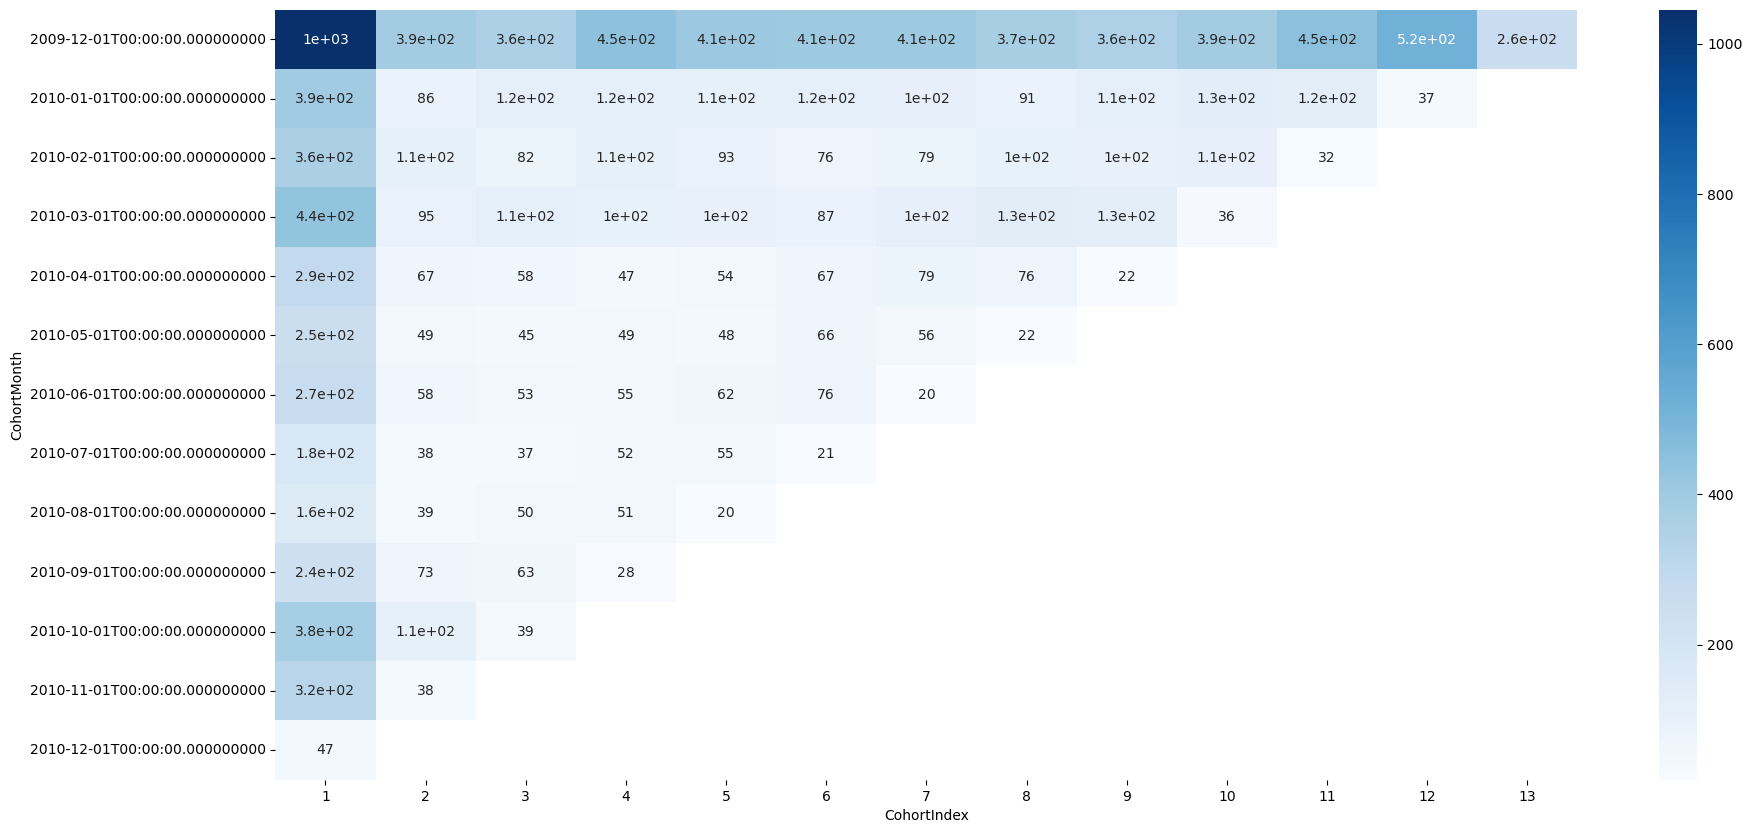

In [52]:
# change index
#cohort_table.index = cohort_table.index.strftime('%B %Y')
#visualize our results in heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')

In [53]:
#cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,1.0,0.375120,0.342584,0.427751,0.392344,0.390431,0.390431,0.357895,0.339713,0.375120,0.432536,0.495694,0.248804
2010-01-01,1.0,0.218274,0.302030,0.304569,0.279188,0.291878,0.266497,0.230964,0.289340,0.340102,0.309645,0.093909,NaN
2010-02-01,1.0,0.300275,0.225895,0.303030,0.256198,0.209366,0.217631,0.283747,0.275482,0.292011,0.088154,NaN,NaN
2010-03-01,1.0,0.217890,0.259174,0.236239,0.229358,0.199541,0.240826,0.298165,0.288991,0.082569,NaN,NaN,NaN
2010-04-01,1.0,0.230241,0.199313,0.161512,0.185567,0.230241,0.271478,0.261168,0.075601,NaN,NaN,NaN,NaN
2010-05-01,1.0,0.192913,0.177165,0.192913,0.188976,0.259843,0.220472,0.086614,NaN,NaN,NaN,NaN,NaN
2010-06-01,1.0,0.215613,0.197026,0.204461,0.230483,0.282528,0.074349,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.0,0.207650,0.202186,0.284153,0.300546,0.114754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,1.0,0.246835,0.316456,0.322785,0.126582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='CohortMonth'>

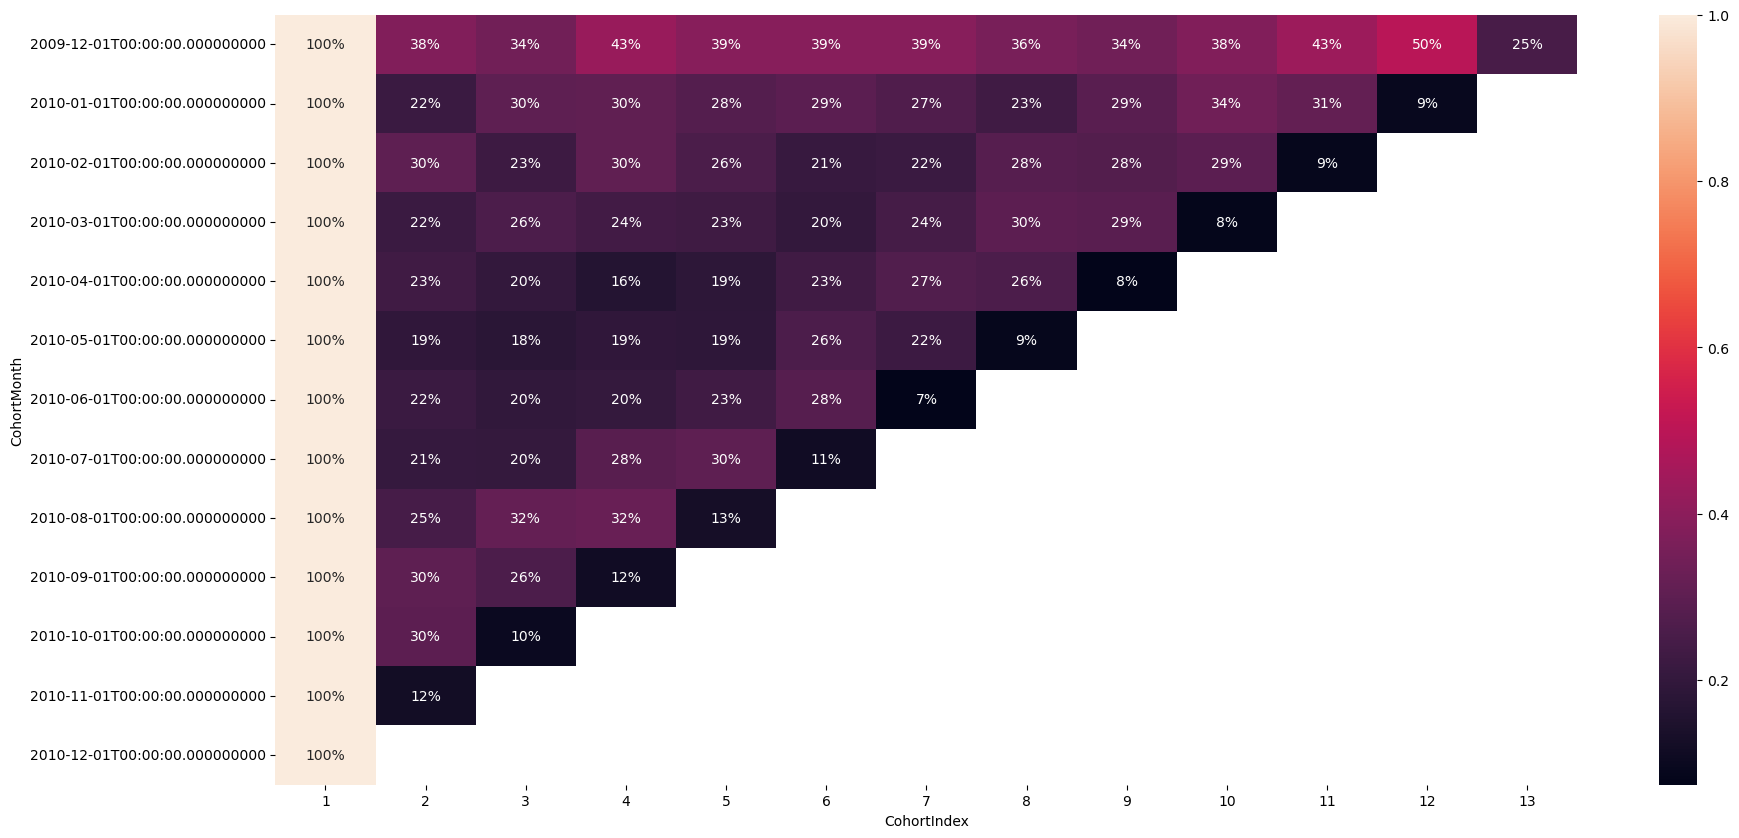

In [54]:
#create a percentages visual
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%')

In [56]:
df.to_csv('df_after_cohort.csv')